In [63]:
#Importing all the libraries

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [64]:
#Create Dataframe from a csv file and converting float columns to int

house_df=pd.read_csv("Cumming_GA_PropertiesList.csv")
house_df['Year Built']=house_df['Year Built'].fillna(0).astype(np.int64)
house_df['Zip code']=house_df['Zip code'].fillna(0).astype(np.int64)
house_df['No.of Bedrooms']=house_df['No.of Bedrooms'].fillna(0).astype(np.int64)
house_df['No.of Bathrooms']=house_df['No.of Bathrooms'].fillna(0).astype(np.int64)
#Dropping Address column
house_df=house_df.drop(['Address'],axis=1)

In [65]:
house_df.dtypes

Zip code              int64
Price               float64
No.of Bedrooms        int64
No.of Bathrooms       int64
Sq.ft               float64
HouseType            object
Basementtype         object
Lot Size (Acres)    float64
Year Built            int64
dtype: object

In [66]:
features = ['Zip code','Price','No.of Bedrooms','No.of Bathrooms','Sq.ft','HouseType','Basementtype','Lot Size (Acres)','Year Built']

In [67]:
continuous = ['Price','No.of Bedrooms','No.of Bathrooms','Sq.ft','Lot Size (Acres)']
categorical =['Zip code','HouseType','Basementtype','Year Built']

In [68]:
#Create Dataframe containing the columns in the df dataframe

columns=pd.DataFrame(list(house_df.columns.values))

In [69]:
#DataQuality Report for Continous features

#Create a DataFrame of the data type of each column

data_types=pd.DataFrame(house_df[continuous].dtypes,columns=['Data Type'])

In [70]:
#Create a DataFrame with count of missing values in each column

missing_data_counts=pd.DataFrame(house_df[continuous].isnull().sum(),columns=['Missing'])

In [71]:
#Create a DataFrame with count of present values in each column

present_data_counts=pd.DataFrame(house_df[continuous].count(),columns=['Count'])

In [72]:
#Create a DataFrame with the count of unique values in each column

unique_value_counts = pd.DataFrame(columns=['Cardinality'])
for v in list(house_df[continuous].columns.values):
    unique_value_counts.loc[v] = [house_df[v].nunique()]

In [73]:
#Create a DataFrame with Minimum values in each column

minimum_values = pd.DataFrame(columns=['Minimum'])
for v in list(house_df[continuous].columns.values):
    minimum_values.loc[v] = [house_df[continuous][v].min()]

In [74]:
#Create a DataFrame with Maximum values in each column

maximum_values = pd.DataFrame(columns=['Maximum'])
for v in list(house_df[continuous].columns.values):
    maximum_values.loc[v] = [house_df[continuous][v].max()]

In [75]:
#Create a DataFrame with Mean values in each column

mean_values=pd.DataFrame(house_df[continuous].mean(),columns=['Mean'])


In [76]:
#Create a DataFrame with First quantile values in each column

first_quartile = pd.DataFrame(columns=['1st Qrt.'])
for v in list(house_df[continuous].columns.values):
    first_quartile.loc[v] = [house_df[continuous][v].quantile(0.25)]

In [77]:
#Create a DataFrame with Third quantile values in each column

third_quartile = pd.DataFrame(columns=['3rd Qrt.'])
for v in list(house_df[continuous].columns.values):
    third_quartile.loc[v] = [house_df[continuous][v].quantile(0.75)]

In [78]:
#Create a DataFrame with Median values in each column

median_values=pd.DataFrame(house_df[continuous].median(),columns=['Median'])


In [79]:
#Create a DataFrame with Standard deviation values in each column

std_values=pd.DataFrame(house_df[continuous].std(),columns=['Standard deviation'])


In [80]:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts).join(minimum_values).join(first_quartile).join(mean_values).join(median_values).join(third_quartile).join(maximum_values).join(std_values)

In [81]:
#DataQuality Report for Categorical features

#Create a DataFrame of the data type of each column

data_types_cat=pd.DataFrame(house_df[categorical].dtypes,columns=['Data Type'])

In [82]:
#Create a DataFrame with count of missing values in each column

missing_data_counts_cat=pd.DataFrame(house_df[categorical].isnull().sum(),columns=['Missing'])


In [83]:
#Create a DataFrame with count of present values in each column

present_data_counts_cat=pd.DataFrame(house_df[categorical].count(),columns=['Count'])

In [84]:
#Create a DataFrame with the count of unique values in each column

unique_value_counts_cat = pd.DataFrame(columns=['Cardinality'])
for v in list(house_df[categorical].columns.values):
    unique_value_counts_cat.loc[v] = [house_df[v].nunique()]

In [85]:
#Create a DataFrame with Mode value in each column

mode_cat = pd.DataFrame(columns=['Mode'])
for v in list(house_df[categorical].columns.values):
    string = [house_df[v].mode()]
    string_str=str(string)
    temp = string_str.split()
    mode_cat.loc[v] = temp[1]


In [86]:
#Create a DataFrame with Mode frequency value in each column

modefreq_cat = pd.DataFrame(columns=['Mode Frequency'])
for v in list(house_df[categorical].columns.values):
    string = [house_df[v].value_counts(ascending=False).head(1)]
    string_str=str(string)
    temp = string_str.split()
    modefreq_cat.loc[v] = temp[1]

In [87]:
#Create a DataFrame with Mode frequency percentage value in each column

modeper_cat = pd.DataFrame(columns=['Mode Percentage'])
for v in list(house_df[categorical].columns.values):
    string = [house_df[v].value_counts(ascending=False).head(1)]
    string_str=str(string)
    temp = string_str.split()
    modeper_cat.loc[v] = round(((int(temp[1])/house_df[v].size)*100),2)

In [88]:
data_quality_report_categorical=data_types_cat.join(present_data_counts_cat).join(missing_data_counts_cat).join(unique_value_counts_cat).join(mode_cat).join(modefreq_cat).join(modeper_cat)

In [89]:
#Create Dataframe with Features and Missing values %

dataqualitymiss=pd.DataFrame(round(((house_df.isnull().sum()/house_df.count())*100),2),columns=['Data Quality Issue (Missing Values %)'])

In [90]:
#Create Dataframe with potential strategy handling for missing values

dataqualitymiss['Potential Handling Strategies']='Knn Imputation'
dataqualitymiss=dataqualitymiss.drop(dataqualitymiss[(dataqualitymiss['Data Quality Issue (Missing Values %)']==0.00)].index)

In [91]:
#Outlier % for Price feature
totalrows=len(house_df)
Q1 = house_df['Price'].quantile(0.25)
Q3 = house_df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
house_dfprice = house_df[~((house_df['Price'] < lower) |(house_df['Price'] > upper))]
priceoutpercentage=((totalrows-len(house_dfprice))/totalrows)*100

In [92]:
#Outlier % for Lot Size (Acres)
Q1 = house_df['Lot Size (Acres)'].quantile(0.25)
Q3 = house_df['Lot Size (Acres)'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
house_dflot = house_df[~((house_df['Lot Size (Acres)'] < lower) |(house_df['Lot Size (Acres)'] > upper))]
lotoutpercentage=((totalrows-len(house_dflot))/totalrows)*100

In [93]:
#Outlier % for No.of Bathrooms
Q1 = house_df['No.of Bathrooms'].quantile(0.25)
Q3 = house_df['No.of Bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
house_dfbath = house_df[~((house_df['No.of Bathrooms'] < lower) |(house_df['No.of Bathrooms'] > upper))]
bathoutpercentage=((totalrows-len(house_dfbath))/totalrows)*100

In [94]:
#Outlier % for Sq.ft
Q1 = house_df['Sq.ft'].quantile(0.25)
Q3 = house_df['Sq.ft'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
house_dfsqft = house_df[~((house_df['Sq.ft'] < lower) |(house_df['Sq.ft'] > upper))]
sqftoutpercentage=((totalrows-len(house_dfsqft))/totalrows)*100

In [95]:
#Outlier % for Year Built
Q1 = house_df['Year Built'].quantile(0.25)
Q3 = house_df['Year Built'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
house_dfyear = house_df[~((house_df['Year Built'] < lower) |(house_df['Year Built'] > upper))]
yearoutpercentage=((totalrows-len(house_dfyear))/totalrows)*100

In [96]:
#Create Dataframe with Features and Outliers %

dataqualityout=pd.DataFrame(columns=['Features','Outliers %','Potential Handling Strategies'])
dataqualityout['Features']=['Price','No.of Bathrooms','Sq.ft','Lot Size (Acres)','Year Built']
dataqualityout['Outliers %']=[priceoutpercentage,bathoutpercentage,sqftoutpercentage,lotoutpercentage,yearoutpercentage]
dataqualityout['Potential Handling Strategies']='IQR Method'

In [97]:
#To show the sample data
house_df.head(10)

,Zip code,Price,No.of Bedrooms,No.of Bathrooms,Sq.ft,HouseType,Basementtype,Lot Size (Acres),Year Built
0,30041,650000.0,3,4,2700.0,Basement,Finished,0.75,1981
1,30040,389000.0,5,4,3150.0,No Basement,Slab,0.41,2006
2,30040,412000.0,5,4,3280.0,Basement,Finished,0.40,2015
3,30040,430000.0,4,3,3284.0,Basement,Unfinished,0.27,2015
4,30040,444900.0,3,3,2000.0,No Basement,Slab,0.12,2020
5,30041,340000.0,5,3,3706.0,Basement,Finished,0.50,2001
6,30041,348000.0,5,4,3097.0,Basement,Finished,0.21,2006
7,30040,324095.0,4,3,2848.0,No Basement,Slab,0.78,1989
8,30028,349450.0,5,4,3220.0,No Basement,Slab,0.27,2018
9,30040,320000.0,4,3,3265.0,No Basement,Slab,0.22,2011


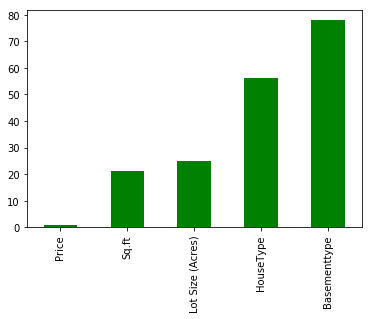

In [98]:
#Visualization of Missing values in the dataset

missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='g')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a257a9a90>,
      dtype=object)

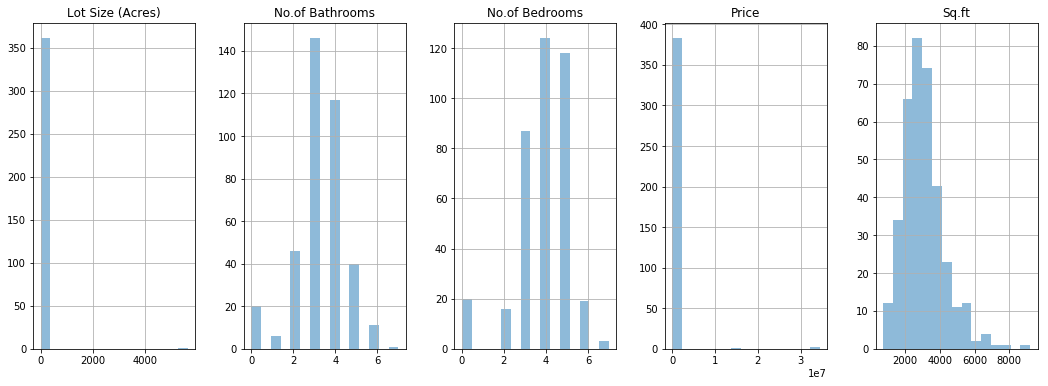

In [100]:
# For numerical attributes

fig, ax=plt.subplots(1,5,figsize=(18,6))
adf_for_hist=house_df[continuous]
adf_for_hist.hist(bins=15, alpha=0.5, ax=ax)


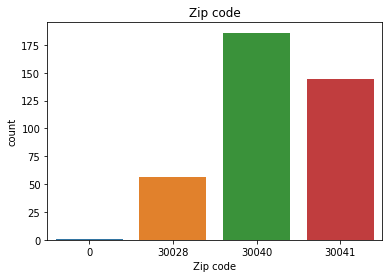

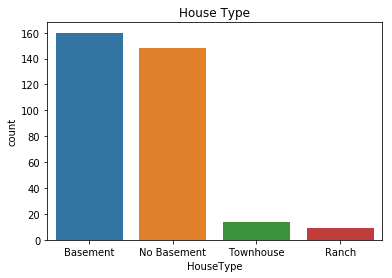

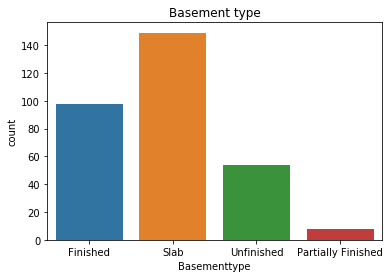

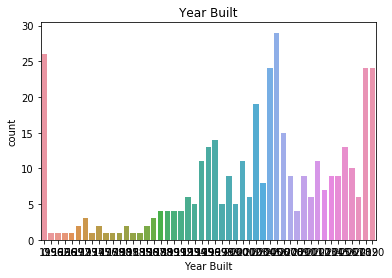

In [101]:
#For Categorical Features
sns.countplot(house_df['Zip code']);
plt.title('Zip code');
plt.show();

sns.countplot(house_df['HouseType']);
plt.title('House Type')
plt.show();

plt.title('Basement type');
sns.countplot(house_df['Basementtype']);
plt.show();

sns.countplot(house_df['Year Built']);
plt.title('Year Built')
plt.show();

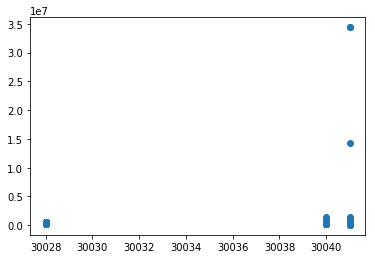

In [102]:
#Identify Which area is Expensive?

plt.scatter(house_df['Zip code'],house_df['Price'])

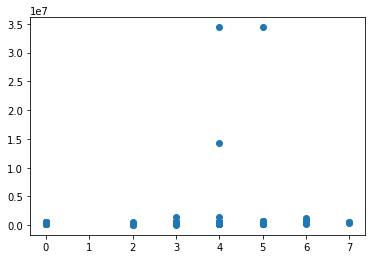

In [103]:
#Identify relationship between count of bedrooms and Price

plt.scatter(house_df['No.of Bedrooms'],house_df['Price'])

In [104]:
#Identify Outliers and remove them using InterQuartile Method

print("The count of instances before removing outliers")
print(house_df.shape)

#Finding the outlier

Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

#Identifying lower and upper bound outliers for attributes

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

#Removing the outlier

house_dfout = house_df[~((house_df < (Q1 - 1.5 * IQR)) |(house_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#print the shape after removing outliers
print("The count of instances after removing outliers")
print(house_dfout.shape)

The count of instances before removing outliers
(387, 9)
The count of instances after removing outliers
(268, 9)


In [105]:
#Identifying Missing Values and Unique values for all the features
house_dfout['Year Built'].replace(0, np.nan, inplace= True)
for (name, series) in house_dfout.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values{0}%'.format(((series.isnull().sum()/series.size)*100)))
    print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: Zip code
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 2
ANALYZING THE COLUMN: Price
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 196
ANALYZING THE COLUMN: No.of Bedrooms
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 6
ANALYZING THE COLUMN: No.of Bathrooms
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 4
ANALYZING THE COLUMN: Sq.ft
	Total number of records 268
	Number of missing values 1
	Percentage of missing values0.3731343283582089%
	Number of unique values 250
ANALYZING THE COLUMN: HouseType
	Total number of records 268
	Number of missing values 20
	Percentage of missing values7.462686567164178%
	Number of unique values 5
ANALYZING THE COLUMN: Basementtype
	Total number of records 268


//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [106]:
#Handling Missing Values here
#Imputation using Simple Imputation

imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(house_dfout)
imputed_train_df = imp_mean.transform(house_dfout)

imputeddf=pd.DataFrame(imputed_train_df)
imputeddf.columns=['Zipcode','Price','No_of_Bedrooms','No_of_Bathrooms','Sq_ft','HouseType','Basementtype','Lot_Size(Acres)','Year_Built']

imputeddf['Year_Built']=imputeddf['Year_Built'].astype(np.int64)

In [107]:
# To check if the missing values are imputed
for (name, series) in imputeddf.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values{0}%'.format(((series.isnull().sum()/series.size)*100)))
    print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: Zipcode
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 2
ANALYZING THE COLUMN: Price
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 196
ANALYZING THE COLUMN: No_of_Bedrooms
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 6
ANALYZING THE COLUMN: No_of_Bathrooms
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 4
ANALYZING THE COLUMN: Sq_ft
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 249
ANALYZING THE COLUMN: HouseType
	Total number of records 268
	Number of missing values 0
	Percentage of missing values0.0%
	Number of unique values 4
ANALYZING THE COLUMN: Basementtype
	Total number of records 268
	Number of missing values 0
	Pe

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


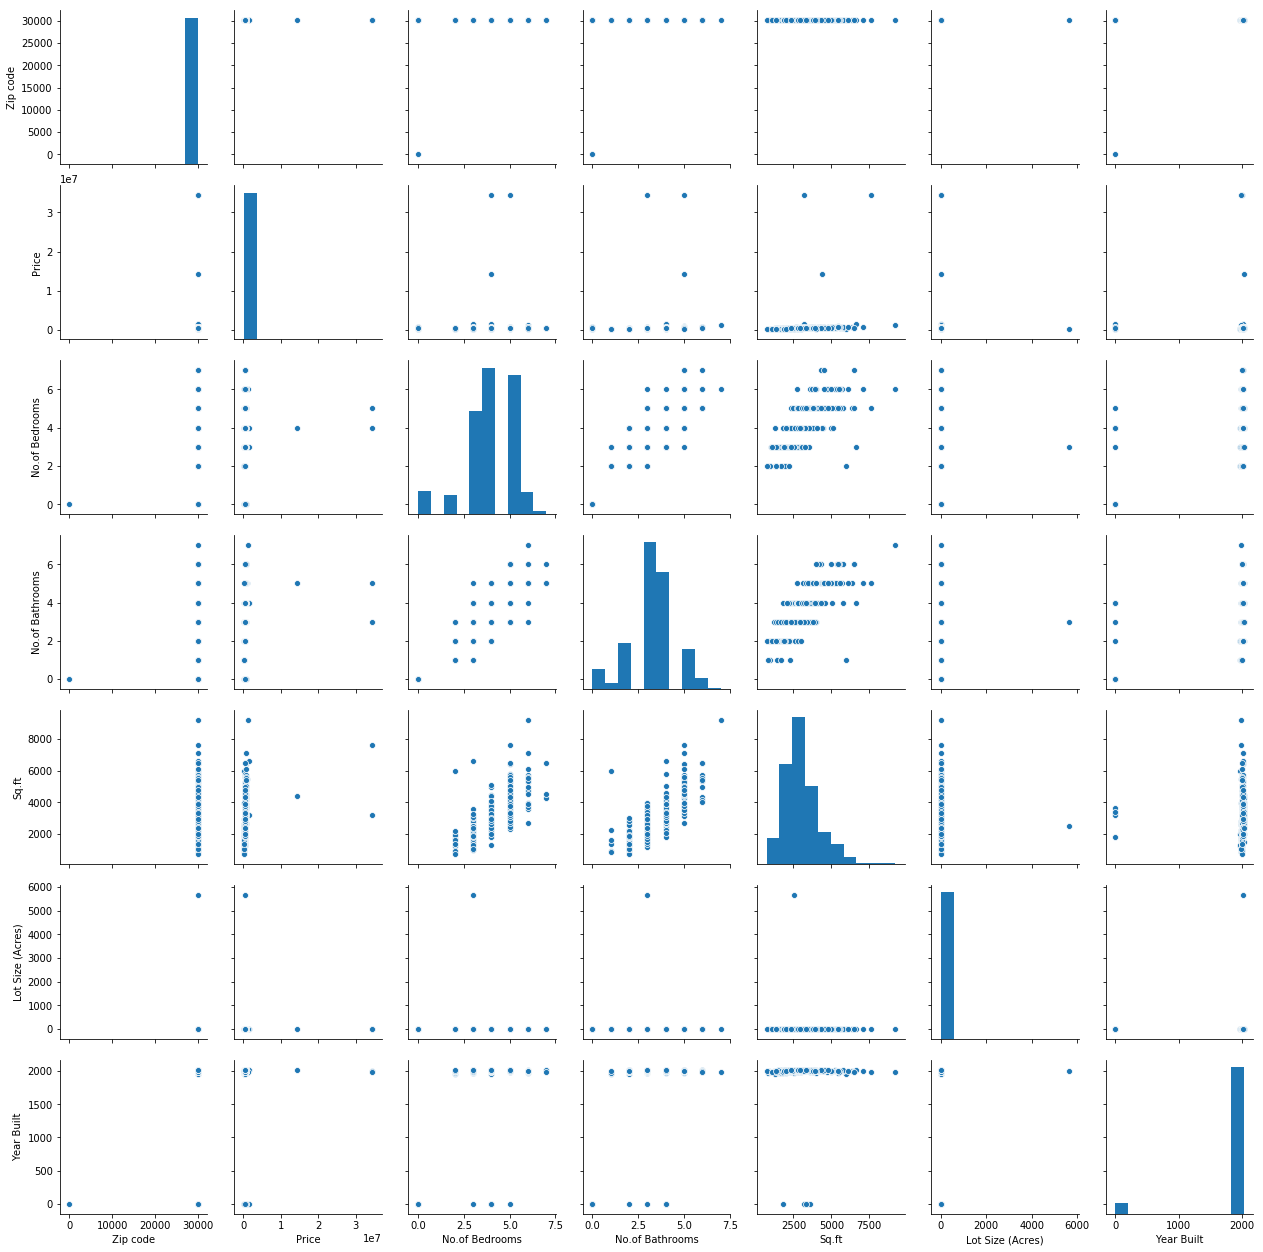

In [108]:
#Visualization of features in the dataset

sns.pairplot(house_df)
plt.show();

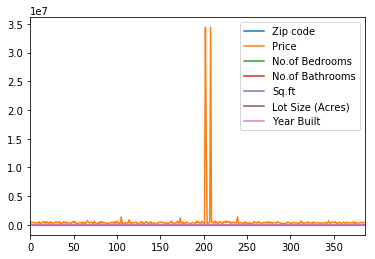

In [109]:
#Visualization of features using plot before Outliers and Missing values
house_df.plot() 

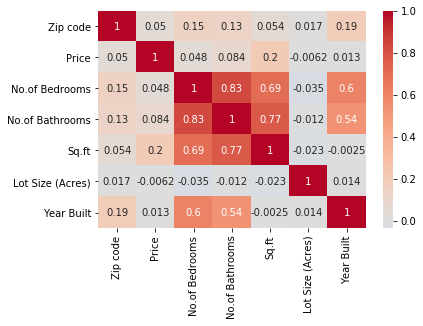

In [110]:
#Visualization of Correlation Matrix
sns.heatmap(house_df.corr(),annot=True,cmap='coolwarm',center=0)

In [111]:
#Converting Price type to float to fit into transformations
imputeddf['Price'] = imputeddf['Price'].astype(float)

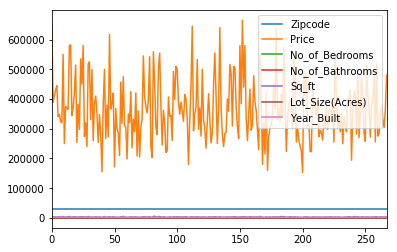

In [112]:
#Visualization of features after removing outliers and missing values
imputeddf.plot()

In [113]:
#Data transformation (Normalization)

#Change string values to numerical using label encoder 
#Need to do this for fit

le = preprocessing.LabelEncoder()
le.fit(imputeddf['HouseType'])
imputeddf['HouseType']=le.transform(imputeddf['HouseType'])

le.fit(imputeddf['Basementtype'])
imputeddf['Basementtype']=le.transform(imputeddf['Basementtype'])


In [114]:
#Normalization

independent_variables=imputeddf.columns
independent_variables=independent_variables.delete(1)
X=imputeddf[independent_variables]
Y=imputeddf['Price']

scaler = MinMaxScaler()
Xnorm = scaler.fit_transform(X)
print("Values after Normalization")
Xnorm

Values after Normalization


array([[1.        , 0.2       , 0.66666667, ..., 0.        , 0.6952381 ,
        0.1875    ],
       [0.        , 0.6       , 0.66666667, ..., 0.66666667, 0.37142857,
        0.70833333],
       [0.        , 0.6       , 0.66666667, ..., 0.        , 0.36190476,
        0.89583333],
       ...,
       [0.        , 0.6       , 0.66666667, ..., 1.        , 0.12380952,
        0.875     ],
       [0.        , 0.6       , 0.66666667, ..., 0.        , 0.41904762,
        0.54166667],
       [1.        , 0.6       , 0.66666667, ..., 0.66666667, 0.12380952,
        0.9375    ]])

In [115]:
#Create dataframe with normalized data

data=pd.DataFrame(Xnorm)
data.columns=independent_variables

In [116]:
#log transform target variable to fit into transformations

Y = np.log2(imputeddf['Price'])

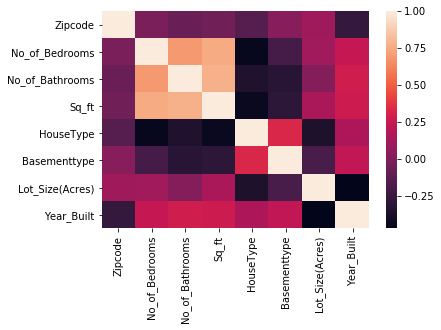

In [117]:
#Feature Selection (Correlation Co-efficient Scores) - Filter Method

corr=data.corr()
sns.heatmap(corr)

In [118]:
#Performing feature selection using Correlation scores method
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [119]:
selected_columns #Which means no features exceeded 0.9 correlation value

Index(['Zipcode', 'No_of_Bedrooms', 'No_of_Bathrooms', 'Sq_ft', 'HouseType',
       'Basementtype', 'Lot_Size(Acres)', 'Year_Built'],
      dtype='object')

In [120]:
#Feature Selection (Sequential Forward Selection) - Wrapper Method

LR=LinearRegression()
sfs1=sfs(LR,k_features=7,forward=True,floating=False,scoring='r2',verbose=2,cv=5)
sfs1=sfs1.fit(data,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2020-04-26 21:53:42] Features: 1/7 -- score: 0.5574868654744569[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2020-04-26 21:53:42] Features: 2/7 -- score: 0.5676532947859163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2020-04-26 21:53:42] Features: 3/7 -- score: 0.5791930778356562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [121]:
#Selecting top 7 features
feat_cols=list(sfs1.k_feature_idx_)
print(feat_cols) #Selected Features - Zipcode,No_of_Bedrooms,No_of_Bathrooms,Sq_ft,HouseType,Basementtype,Lot_Size(Acres)

#Feature with less score - Year_Built

[1, 2, 3, 4, 5, 6, 7]


In [122]:
data.columns

Index(['Zipcode', 'No_of_Bedrooms', 'No_of_Bathrooms', 'Sq_ft', 'HouseType',
       'Basementtype', 'Lot_Size(Acres)', 'Year_Built'],
      dtype='object')

In [123]:
print("\nData Quality Report for Continuous features")
print("Total records: {}".format(len(house_df[continuous].index)))
data_quality_report


Data Quality Report for Continuous features
Total records: 387


,Data Type,Count,Missing,Cardinality,Minimum,1st Qrt.,Mean,Median,3rd Qrt.,Maximum,Standard deviation
Price,float64,386,1,274,63200.00,295326.25,596711.126943,359450.00,449437.50,34400000.0,2.547623e+06
No.of Bedrooms,int64,387,0,7,0.00,3.00,3.912145,4.00,5.00,7.0,1.336042e+00
No.of Bathrooms,int64,387,0,8,0.00,3.00,3.299742,3.00,4.00,7.0,1.254247e+00
Sq.ft,float64,366,21,341,730.00,2258.25,3050.366120,2937.00,3639.50,9201.0,1.175749e+03
Lot Size (Acres),float64,362,25,99,0.02,0.21,16.142265,0.31,0.58,5663.0,2.976155e+02


In [124]:
print("\nData Quality Report for Categorical features")
print("Total records: {}".format(len(house_df[categorical].index)))
data_quality_report_categorical


Data Quality Report for Categorical features
Total records: 387


,Data Type,Count,Missing,Cardinality,Mode,Mode Frequency,Mode Percentage
Zip code,int64,387,0,4,30040,186,48.06
HouseType,object,331,56,4,Basement,160,41.34
Basementtype,object,309,78,4,Slab,149,38.50
Year Built,int64,387,0,49,2006,29,7.49


In [125]:
#Data Quality Plan for Missing Values

print("\nData Quality Plan for Missing Values")
print("Total records: {}".format(len(house_df.index)))
dataqualitymiss


Data Quality Plan for Missing Values
Total records: 387


,Data Quality Issue (Missing Values %),Potential Handling Strategies
Price,0.26,Knn Imputation
Sq.ft,5.74,Knn Imputation
HouseType,16.92,Knn Imputation
Basementtype,25.24,Knn Imputation
Lot Size (Acres),6.91,Knn Imputation


In [126]:
#Data Quality Plan for Outliers

print("\nData Quality Plan for Outliers")
print("Total records: {}".format(len(house_df.index)))
dataqualityout


Data Quality Plan for Outliers
Total records: 387


,Features,Outliers %,Potential Handling Strategies
0,Price,3.100775,IQR Method
1,No.of Bathrooms,9.819121,IQR Method
2,Sq.ft,3.100775,IQR Method
3,Lot Size (Acres),5.167959,IQR Method
4,Year Built,7.751938,IQR Method
